In [82]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [83]:
df=pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
df.shape

(10000, 14)

In [85]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [86]:
df[df.duplicated()].sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

In [87]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
df=df.drop(columns=['RowNumber', 'CustomerId','Surname'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

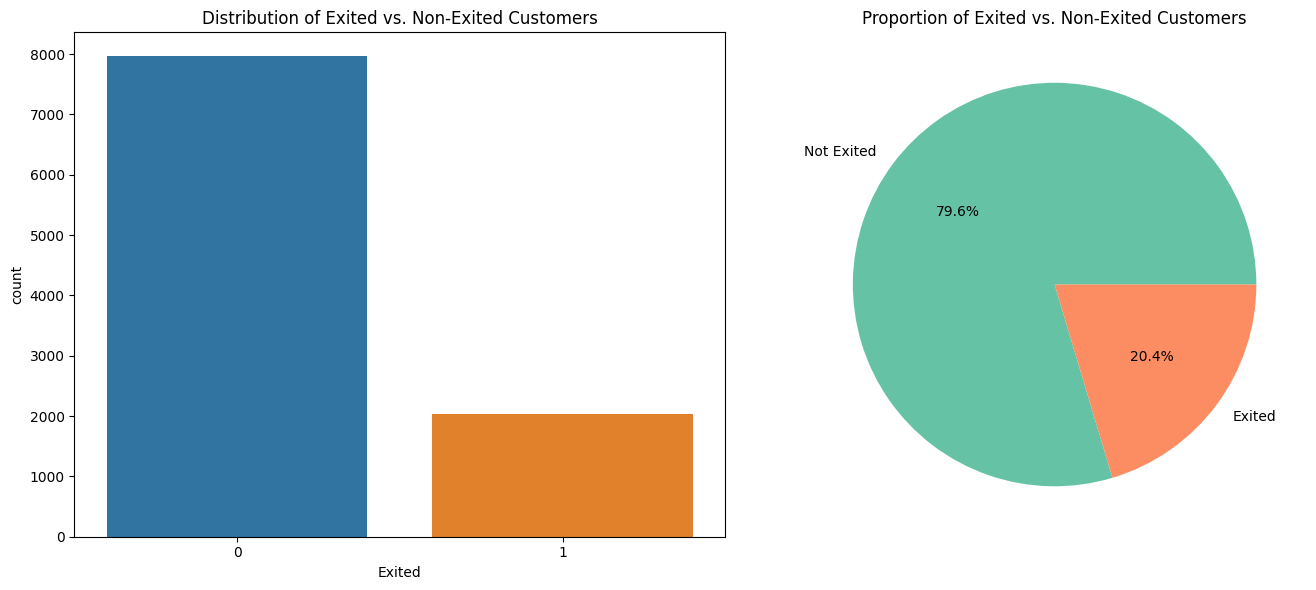

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count Plot for Target Variable
sns.countplot(x='Exited', data=df, ax=axes[0])
axes[0].set_title('Distribution of Exited vs. Non-Exited Customers')

# Pie Chart for Target Variable
churn_counts = df['Exited'].value_counts()
axes[1].pie(churn_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
axes[1].set_title('Proportion of Exited vs. Non-Exited Customers')

# Show the plots
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


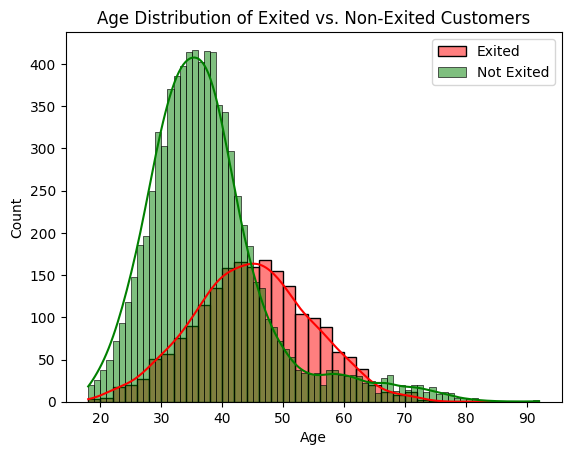

In [91]:
sns.histplot(df[df['Exited'] == 1]['Age'], color='red', label='Exited', kde=True)
sns.histplot(df[df['Exited'] == 0]['Age'], color='green', label='Not Exited', kde=True)
plt.legend()
plt.title('Age Distribution of Exited vs. Non-Exited Customers')
plt.show()

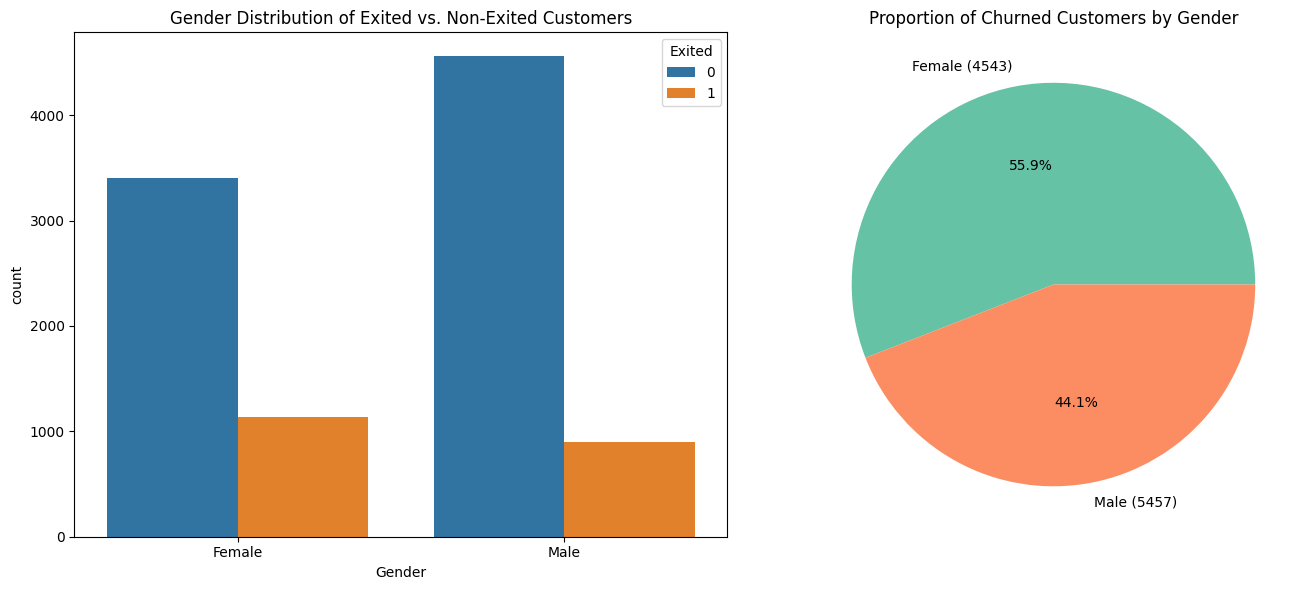

In [92]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count Plot for Gender Distribution
sns.countplot(x='Gender', hue='Exited', data=df, ax=axes[0])
axes[0].set_title('Gender Distribution of Exited vs. Non-Exited Customers')

# Pie Chart for Churn Proportion by Gender
gender_churn = df.groupby('Gender')['Exited'].mean()  # Calculate the proportion of churned customers by gender
gender_counts = df['Gender'].value_counts()  # Count the number of customers by gender

# Create pie chart showing proportions of churned and non-churned customers by gender
colors = ['#66c2a5', '#fc8d62']  # Colors for pie chart
labels = [f'{gender} ({gender_counts[gender]})' for gender in gender_churn.index]  # Label with count
sizes = [gender_churn[gender] * gender_counts[gender] for gender in gender_churn.index]  # Proportion sizes

axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Proportion of Churned Customers by Gender')

# Show the plots
plt.tight_layout()
plt.show()

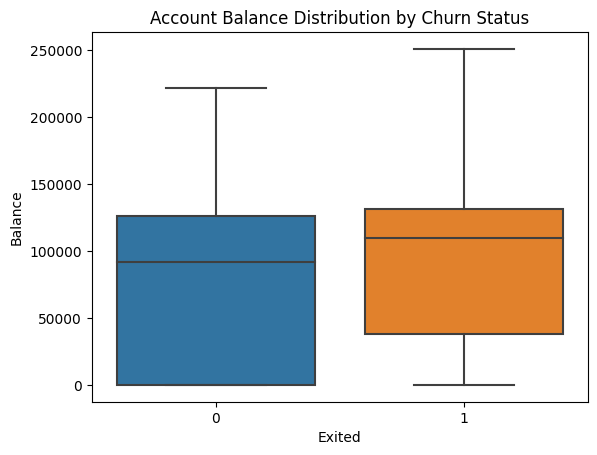

In [93]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Account Balance Distribution by Churn Status')
plt.show()

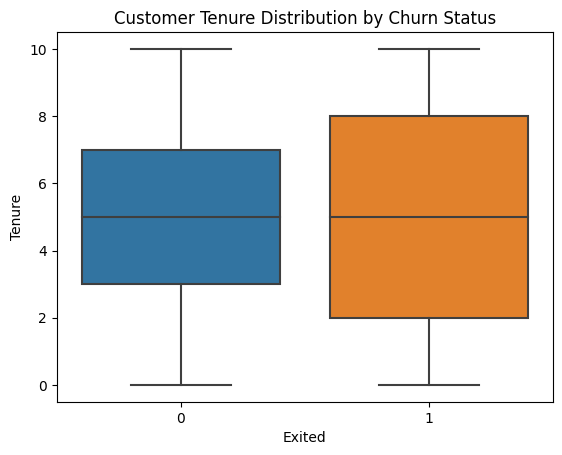

In [94]:
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.title('Customer Tenure Distribution by Churn Status')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

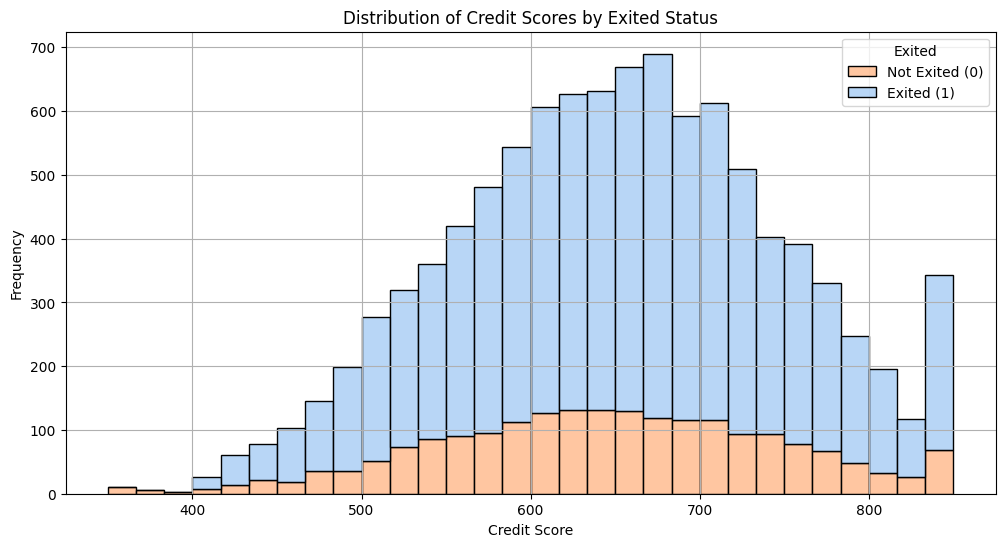

In [95]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', multiple='stack', bins=30, palette='pastel', kde=False)
plt.title('Distribution of Credit Scores by Exited Status')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(title='Exited', labels=['Not Exited (0)', 'Exited (1)'])
plt.show()

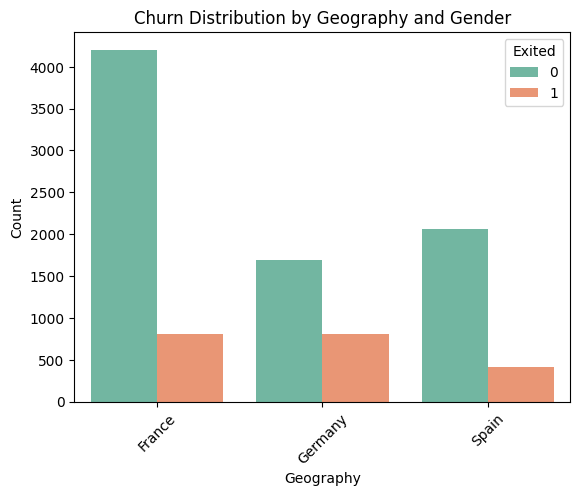

In [96]:
sns.countplot(data=df, x='Geography', hue='Exited', palette='Set2', order=df['Geography'].value_counts().index)
plt.title('Churn Distribution by Geography and Gender')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [97]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [98]:
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [99]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
df['Geography']=labelencoder.fit_transform(df['Geography'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


<Figure size 1000x600 with 0 Axes>

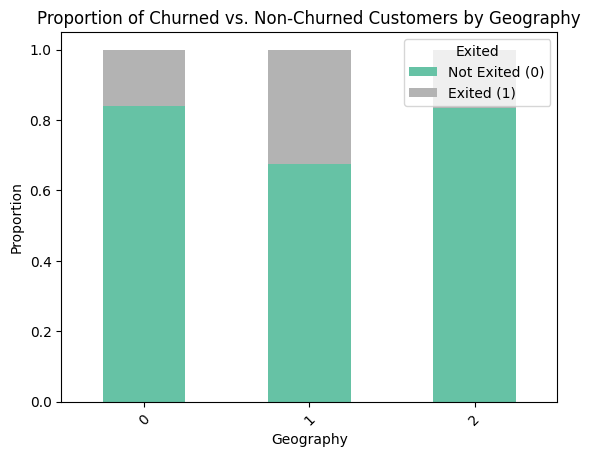

<Figure size 1000x600 with 0 Axes>

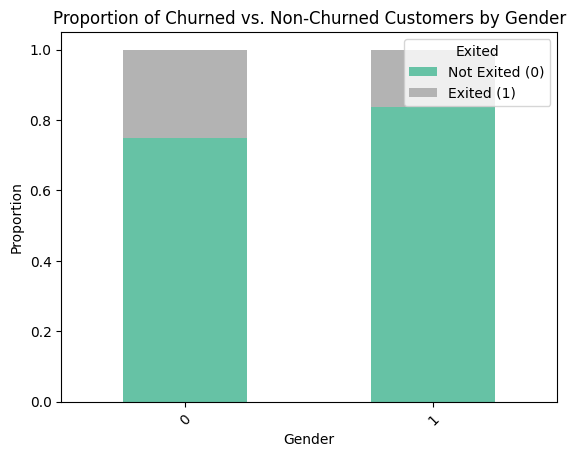

In [101]:
# Create a stacked bar chart for Geography by Exited Status
geography_churn = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)
geography_churn = geography_churn.div(geography_churn.sum(axis=1), axis=0)  # Normalize to get proportions

plt.figure(figsize=(10, 6))
geography_churn.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proportion of Churned vs. Non-Churned Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Proportion')
plt.legend(title='Exited', labels=['Not Exited (0)', 'Exited (1)'])
plt.xticks(rotation=45)
plt.show()

# Create a stacked bar chart for Gender by Exited Status
gender_churn = df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)
gender_churn = gender_churn.div(gender_churn.sum(axis=1), axis=0)  # Normalize to get proportions

plt.figure(figsize=(10, 6))
gender_churn.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Proportion of Churned vs. Non-Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Exited', labels=['Not Exited (0)', 'Exited (1)'])
plt.xticks(rotation=45)
plt.show()

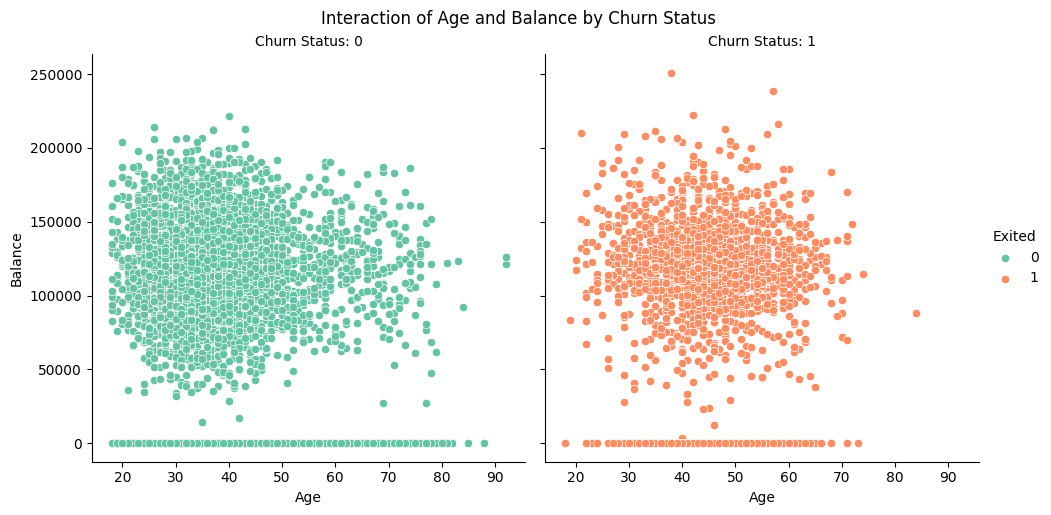

In [102]:
# Create a Facet Grid with scatter plots of Age vs. Balance, colored by Exited status
g = sns.FacetGrid(df, col='Exited', hue='Exited', palette='Set2', height=5)
g.map(sns.scatterplot, 'Age', 'Balance')
g.add_legend()
g.set_axis_labels('Age', 'Balance')
g.set_titles('Churn Status: {col_name}')
plt.suptitle('Interaction of Age and Balance by Churn Status', y=1.02)
plt.show()

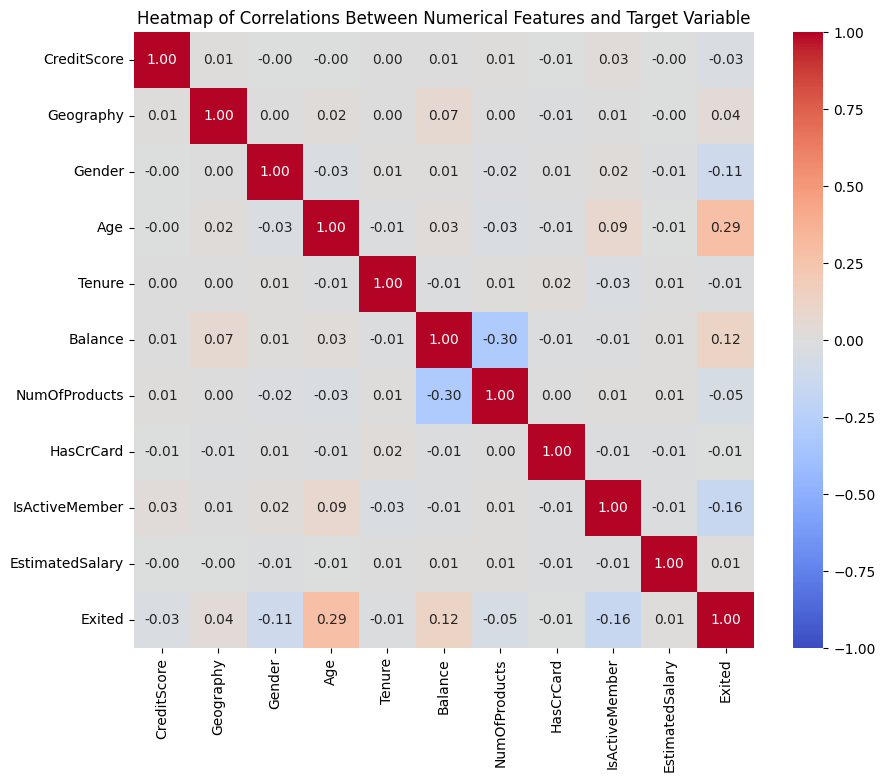

In [103]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap of Correlations Between Numerical Features and Target Variable')
plt.show()

In [104]:
from sklearn.preprocessing import StandardScaler

# Define features to scale
features_to_scale = ['Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Standardization
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check the scaled features
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
1,608,2,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
2,502,0,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1
3,699,0,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
4,850,2,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0


In [105]:
# Calculate the churn rate before training
total_customers = df.shape[0]
churned_customers = df['Exited'].sum()
churn_rate_before = churned_customers / total_customers

print(f"Churn Rate Before Training: {churn_rate_before:.2%}")

Churn Rate Before Training: 20.37%


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = df[features_to_scale]
y = df['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
logistic_model = LogisticRegression()
gradient_boosting_model = GradientBoostingClassifier()
random_forest_model = RandomForestClassifier()

# Train models
logistic_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predict on test set
logistic_preds = logistic_model.predict(X_test)
gradient_boosting_preds = gradient_boosting_model.predict(X_test)
random_forest_preds = random_forest_model.predict(X_test)

# Predict and evaluate
models = {'Logistic Regression': logistic_model, 'Gradient Boosting': gradient_boosting_model, 'Random Forest': random_forest_model}
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.7883333333333333
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2416
           1       0.28      0.06      0.09       584

    accuracy                           0.79      3000
   macro avg       0.55      0.51      0.49      3000
weighted avg       0.71      0.79      0.73      3000


Gradient Boosting Accuracy: 0.8186666666666667
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2416
           1       0.57      0.28      0.37       584

    accuracy                           0.82      3000
   macro avg       0.71      0.61      0.63      3000
weighted avg       0.79      0.82      0.79      3000


Random Forest Accuracy: 0.796
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2416
           1       0.46      0.27      0.34       584

    accuracy                           0.80      3000

In [107]:
def calculate_churn_rate(predictions, y_true):
    predicted_churned_customers = sum(predictions)
    churn_rate_after = predicted_churned_customers / len(y_true)
    return churn_rate_after

churn_rate_logistic = calculate_churn_rate(logistic_preds, y_test)
churn_rate_gradient_boosting = calculate_churn_rate(gradient_boosting_preds, y_test)
churn_rate_random_forest = calculate_churn_rate(random_forest_preds, y_test)

print(f"Churn Rate After Training (Logistic Regression): {churn_rate_logistic:.2%}")
print(f"Churn Rate After Training (Gradient Boosting): {churn_rate_gradient_boosting:.2%}")
print(f"Churn Rate After Training (Random Forest): {churn_rate_random_forest:.2%}")

Churn Rate After Training (Logistic Regression): 3.90%
Churn Rate After Training (Gradient Boosting): 9.47%
Churn Rate After Training (Random Forest): 11.47%


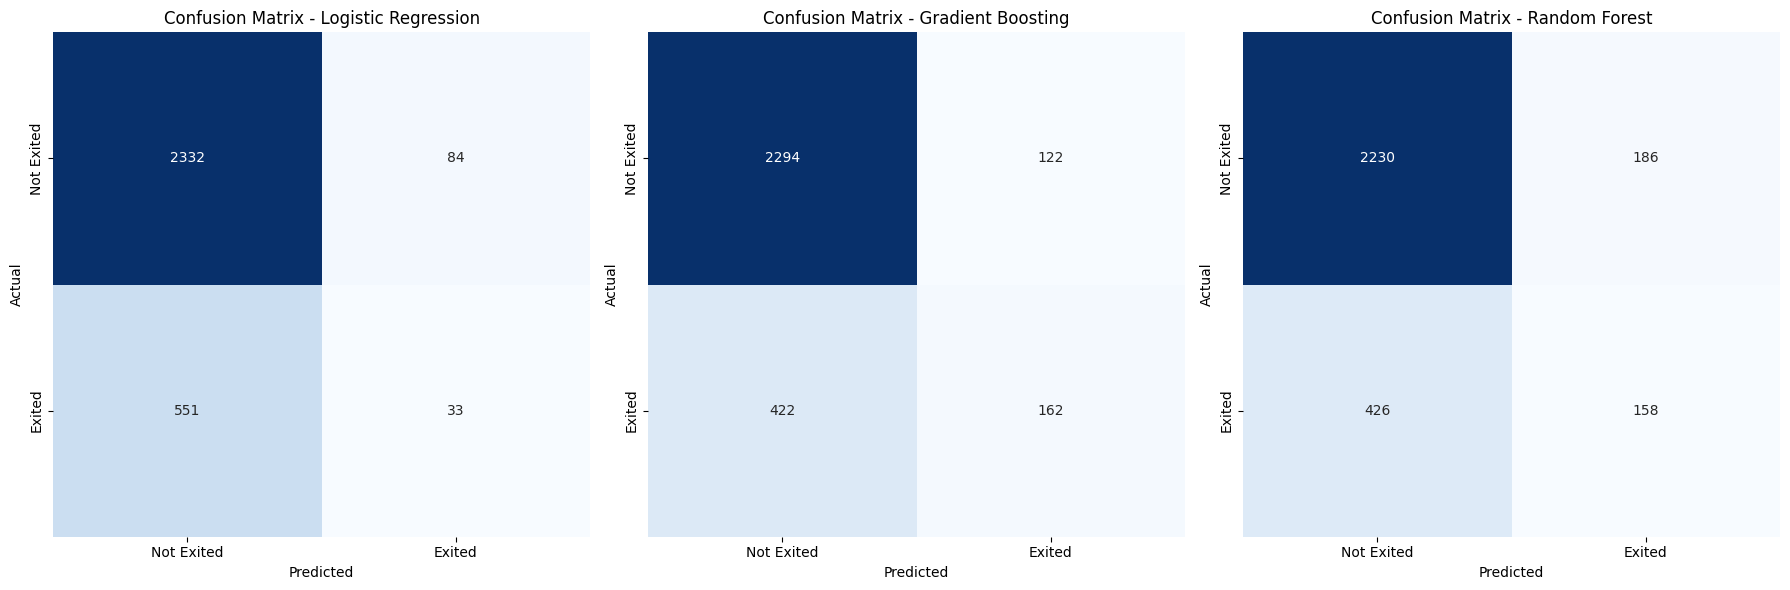

In [108]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Not Exited', 'Exited'], 
                yticklabels=['Not Exited', 'Exited'], ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, logistic_preds, 'Logistic Regression', axes[0])
plot_confusion_matrix(y_test, gradient_boosting_preds, 'Gradient Boosting', axes[1])
plot_confusion_matrix(y_test, random_forest_preds, 'Random Forest', axes[2])

# Adjust layout
plt.tight_layout()
plt.show()

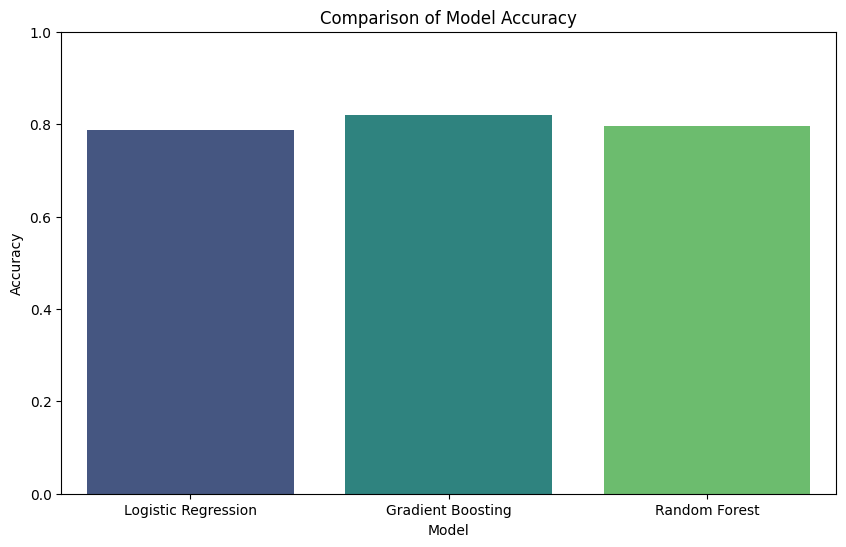

In [109]:
# Define model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Gradient Boosting', 'Random Forest']
accuracies = [
    accuracy_score(y_test, logistic_preds),
    accuracy_score(y_test, gradient_boosting_preds),
    accuracy_score(y_test, random_forest_preds)
]

# Create a DataFrame for easier plotting
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Comparison of Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

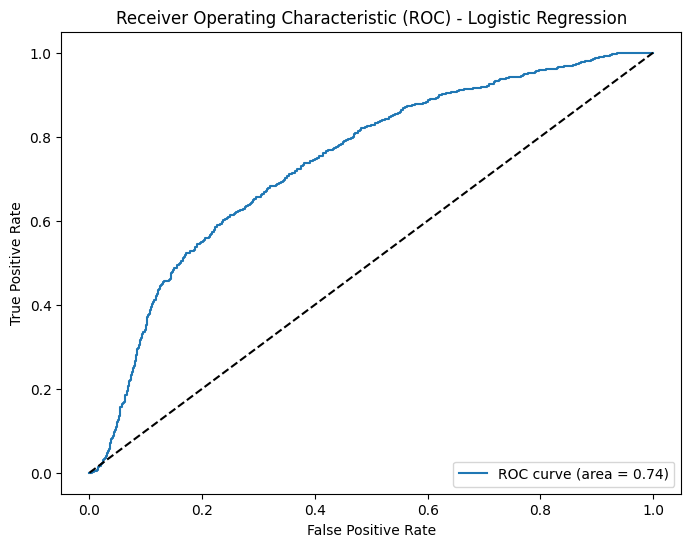

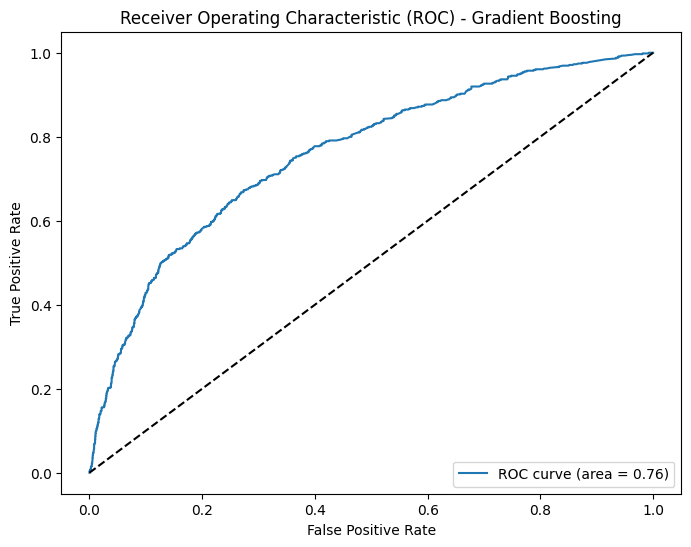

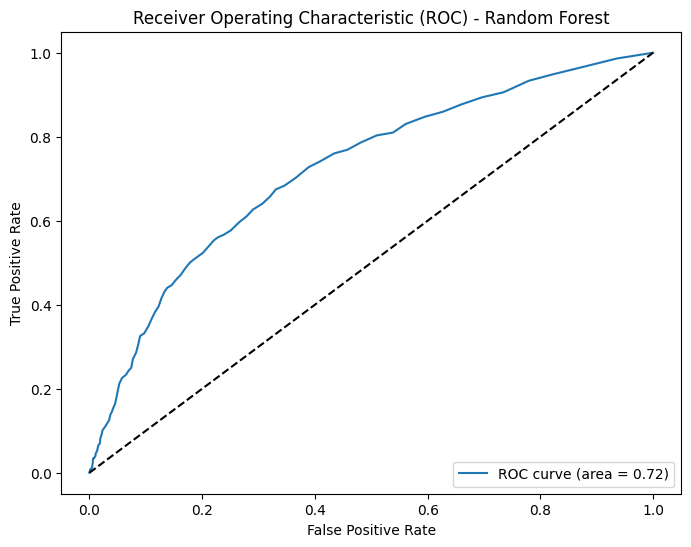

In [110]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Get probability scores for ROC Curve
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]
gradient_boosting_probs = gradient_boosting_model.predict_proba(X_test)[:, 1]
random_forest_probs = random_forest_model.predict_proba(X_test)[:, 1]

# Plot ROC Curve for each model
plot_roc_curve(y_test, logistic_probs, 'Logistic Regression')
plot_roc_curve(y_test, gradient_boosting_probs, 'Gradient Boosting')
plot_roc_curve(y_test, random_forest_probs, 'Random Forest')


In [111]:
import pickle

# Save the best model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(gradient_boosting_model, file)

print(f"The best model has been serialized and saved as 'best_model.pkl'.")


The best model has been serialized and saved as 'best_model.pkl'.
